In [1]:
import pandas as pd

df = pd.read_csv('twitter_training.csv')

df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:
# Check column names
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [3]:
# Check what's in Borderland column

df['Borderlands'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [4]:
# Assign meaningful column names

df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Text']

In [5]:
# Check missing values

df.isna().sum()

Tweet_ID       0
Entity         0
Sentiment      0
Text         686
dtype: int64

In [6]:
# Remove missing values

df.dropna(inplace=True, axis=0)

In [7]:
print(f"After removing missing values: {len(df)} rows")

After removing missing values: 73995 rows


In [63]:
# Clean and process text column

import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

In [9]:
def clean_text(text):
    text = text.lower() # make all texts lower cases
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove urls
    text = re.sub(r'@\w+|\#', '', text) # remove all tags
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remove special characters but keep texts

    # Tokenize and filter out stopwords
    tokens = word_tokenize(text)

    # Initialise lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Stopwords
    sw = set(stopwords.words('english'))

    # Lemmatize and remove stopwords
    lemmatized_tokens = []
    for word in tokens:
        if word not in sw and len(word) > 2:  # remove short words
            # Lemmatize based on POS tag if available
            lemma = lemmatizer.lemmatize(word)
            lemmatized_tokens.append(lemma)

    return ' '.join(lemmatized_tokens)

# Apply it
df['cleaned_content'] = df['Text'].apply(clean_text)

In [10]:
# Add text length

df['text_length'] = df['cleaned_content'].apply(len)

In [11]:
df

,Tweet_ID,Entity,Sentiment,Text,cleaned_content,text_length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,18
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,23
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderland murder,24
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,25
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,getting borderland murder,25
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year behind...,72
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year behind nvid...,73
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year behind nvid...,73
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year behind...,89


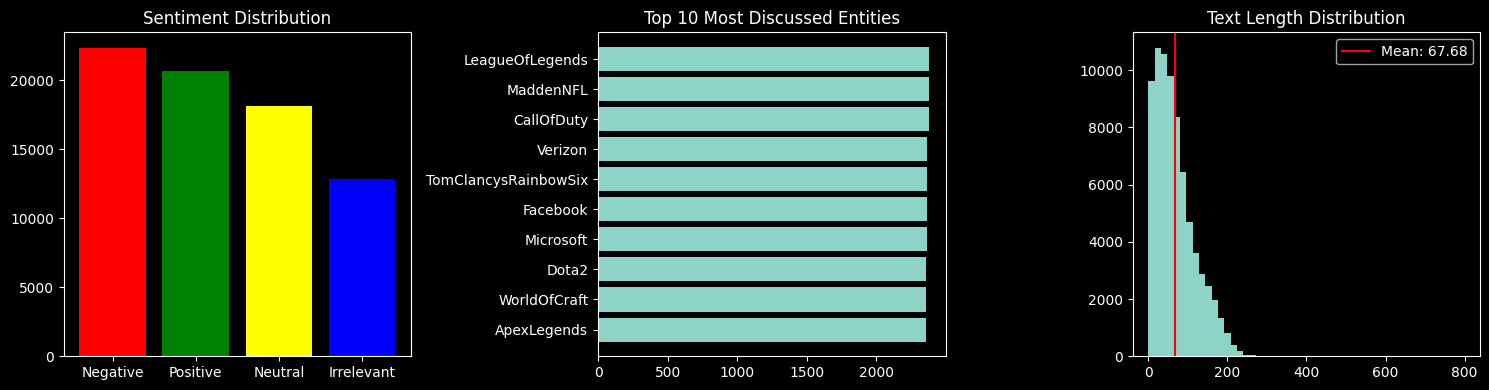

In [12]:
# Now let's check the distribution

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sentiment distribution
sent_counts = df['Sentiment'].value_counts()
axes[0].bar(sent_counts.index, sent_counts.values, color=['red', 'green', 'yellow', 'blue']) # colors you feel like which one is good / bad
axes[0].set(title='Sentiment Distribution')

# Top entities
top_entities = df['Entity'].value_counts().head(10)
axes[1].barh(top_entities.index, top_entities.values)
axes[1].set(title='Top 10 Most Discussed Entities')
axes[1].invert_yaxis() # sort most to least

# Text length distribution
text_lengths = df['text_length']
axes[2].hist(text_lengths, bins=50)
axes[2].axvline(text_lengths.mean(), color='red', label=f'Mean: {text_lengths.mean():.2f}')
axes[2].set(title='Text Length Distribution')
axes[2].legend()

plt.tight_layout()
plt.show()


In [13]:
# Convert cleaned text to numerical features

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) # this uses both unigram/bigrams
X = tfidf.fit_transform(df['cleaned_content']).toarray()
y = df['Sentiment']

In [39]:
# Model Comparison
# We'll use: 1) Logistic Regression 2) Random Forest 3) SVM 4) Naive Bayes 5) Gradient Boosting

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [15]:
# Split data test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Model comparison
# This chunk of codes will take hours to run

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), # parallel processing
    'Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [28]:
# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-Score': f1
    })

    print(f'Accuracy: {accuracy:.3f}')
    print(f'F1-Score: {f1:.3f}')

  Accuracy: 0.680
  F1-Score: 0.677
  Accuracy: 0.865
  F1-Score: 0.865
  Accuracy: 0.636
  F1-Score: 0.623
  Accuracy: 0.525
  F1-Score: 0.499


In [33]:
 # Display results comparison
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy  F1-Score
1        Random Forest  0.864991  0.865014
0  Logistic Regression  0.679505  0.676792
2          Naive Bayes  0.635989  0.623344
3    Gradient Boosting  0.524968  0.498748


In [36]:
# Random Forest performs the best, now let's see classification report

RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

y_pred = RandomForestClassifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.93      0.79      0.85      2575
    Negative       0.88      0.89      0.88      4472
     Neutral       0.89      0.84      0.87      3621
    Positive       0.80      0.91      0.85      4131

    accuracy                           0.86     14799
   macro avg       0.87      0.86      0.86     14799
weighted avg       0.87      0.86      0.87     14799



In [38]:
# Check label for confusion matrix

y_test.unique()

array(['Negative', 'Irrelevant', 'Positive', 'Neutral'], dtype=object)

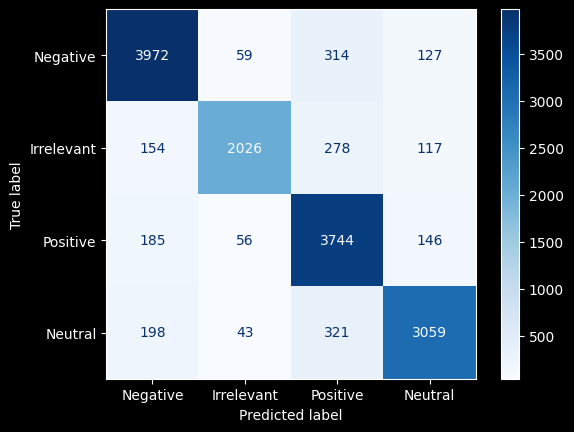

In [37]:
labels = y_test.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(cmap='Blues')
plt.show()

In [46]:
# Now, we're gonna check entities ranking for insights

# Calculate sentiment metrics per entity
entity_sentiment = df.groupby('Entity')['Sentiment'].value_counts().unstack(fill_value=0)

# Calculate ratios and scores
entity_sentiment['Total_Tweets'] = entity_sentiment.sum(axis=1)
entity_sentiment['Positive_Ratio'] = entity_sentiment['Positive'] / entity_sentiment['Total_Tweets']
entity_sentiment['Negative_Ratio'] = entity_sentiment['Negative'] / entity_sentiment['Total_Tweets']
entity_sentiment['Sentiment_Score'] = (entity_sentiment['Positive'] - entity_sentiment['Negative']) / entity_sentiment['Total_Tweets']

entity_sentiment = entity_sentiment.sort_values('Sentiment_Score', ascending=False)

In [48]:
# Top 5 entities ranked by positive sentiment ratio
top_5 = entity_sentiment.head(5)[['Total_Tweets', 'Positive', 'Negative', 'Positive_Ratio', 'Sentiment_Score']]
print(top_5)

Sentiment               Total_Tweets  Positive  Negative  Positive_Ratio  \
Entity                                                                     
AssassinsCreed                  2234      1439       375        0.644136   
RedDeadRedemption(RDR)          2249       927       305        0.412183   
Borderlands                     2279      1016       426        0.445810   
Cyberpunk2077                   2262       950       385        0.419982   
PlayStation5(PS5)               2291       936       453        0.408555   

Sentiment               Sentiment_Score  
Entity                                   
AssassinsCreed                 0.476276  
RedDeadRedemption(RDR)         0.276567  
Borderlands                    0.258885  
Cyberpunk2077                  0.249779  
PlayStation5(PS5)              0.210825  


In [50]:
# Bottom 5 entities ranked by positive sentiment ratio
bottom_5 = entity_sentiment.tail(5)[['Total_Tweets', 'Positive', 'Negative', 'Positive_Ratio', 'Sentiment_Score']]
print(bottom_5)

Sentiment             Total_Tweets  Positive  Negative  Positive_Ratio  \
Entity                                                                   
johnson&johnson               2324       269       845        0.115749   
TomClancysRainbowSix          2364       513      1115        0.217005   
FIFA                          2324       495      1169        0.212995   
NBA2K                         2343       424      1469        0.180965   
MaddenNFL                     2377       396      1694        0.166597   

Sentiment             Sentiment_Score  
Entity                                 
johnson&johnson             -0.247849  
TomClancysRainbowSix        -0.254653  
FIFA                        -0.290017  
NBA2K                       -0.446009  
MaddenNFL                   -0.546066  


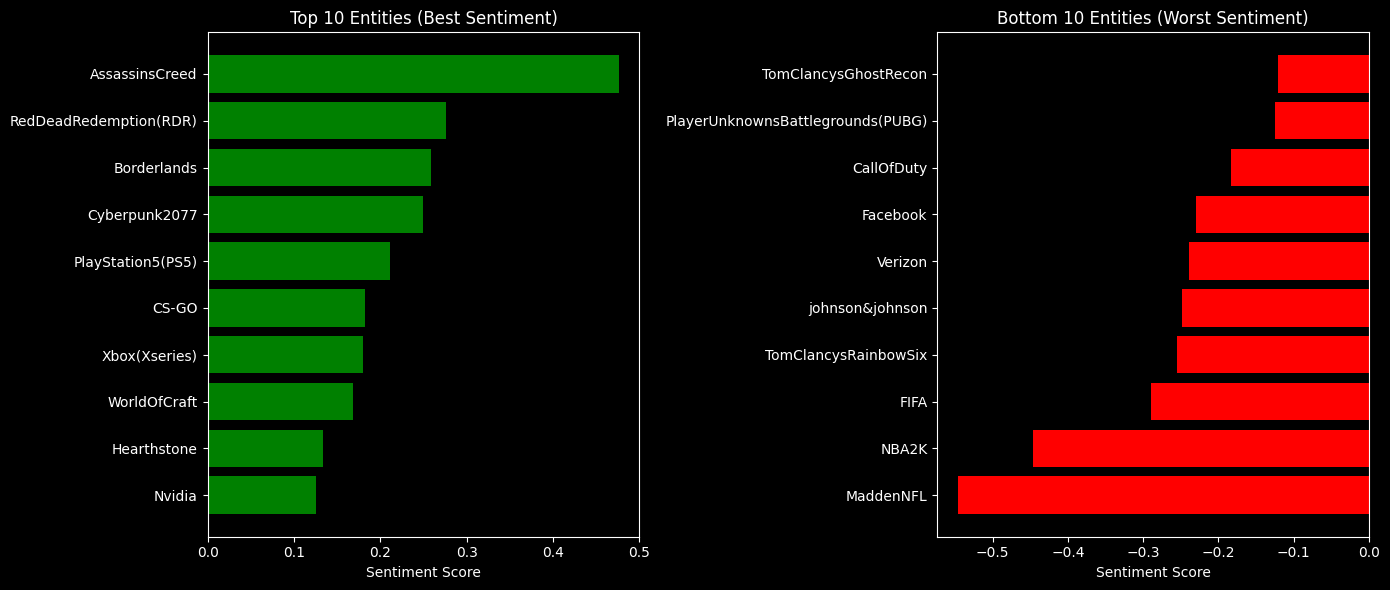

In [61]:
# Now let's visualize the top and bottom entities ranked by positive sentiment ratio

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 entities
top_10 = entity_sentiment.head(10)
axes[0].barh(range(len(top_10)), top_10['Sentiment_Score'].values, color='green')
axes[0].set_yticks(range(len(top_10)))
axes[0].set_yticklabels(top_10.index)
axes[0].set_xlabel('Sentiment Score')
axes[0].set_title('Top 10 Entities (Best Sentiment)')
axes[0].invert_yaxis()

# Bottom 10 entities
bottom_10 = entity_sentiment.tail(10)
axes[1].barh(range(len(bottom_10)), bottom_10['Sentiment_Score'].values, color='red')
axes[1].set_yticks(range(len(bottom_10)))
axes[1].set_yticklabels(bottom_10.index)
axes[1].set_xlabel('Sentiment Score')
axes[1].set_title('Bottom 10 Entities (Worst Sentiment)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

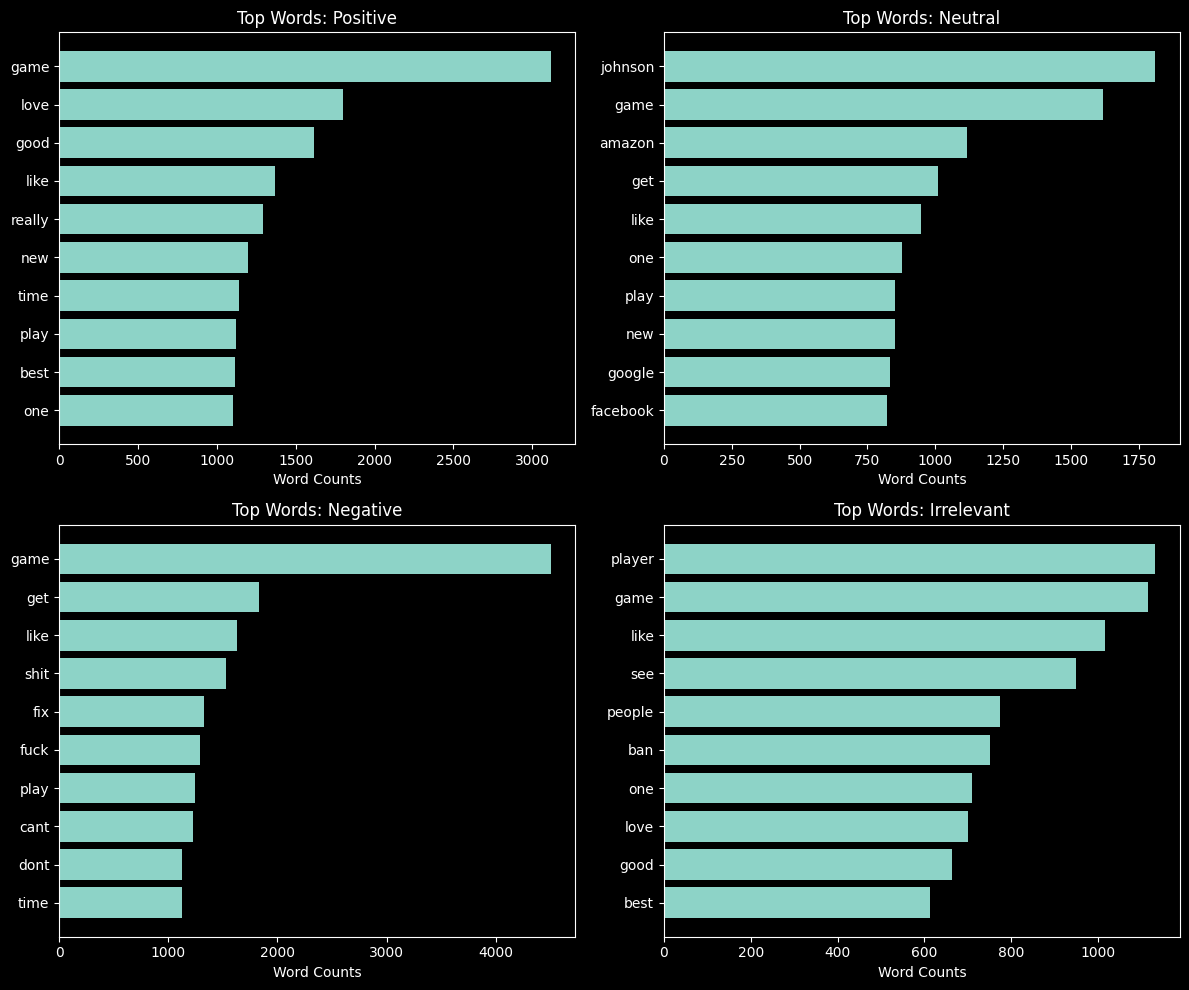

In [68]:
# Common words analysis

def get_top_words(sentiment_df, n=10): # get top10 common words
    all_words = ' '.join(sentiment_df['cleaned_content']).split()
    return Counter(all_words).most_common(n)

# Get top words for each sentiment
sentiments = df['Sentiment'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, sentiment in enumerate(sentiments):
    ax = axes[idx]
    sentiment_df = df[df['Sentiment'] == sentiment]
    top_words = get_top_words(sentiment_df, 10)

    words = [word for word, _ in top_words]
    counts = [count for _, count in top_words]

    ax.barh(range(len(words)), counts)
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.set_xlabel('Word Counts')
    ax.set_title(f'Top Words: {sentiment}')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()